# Data Understanding

In [33]:
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [34]:

import warnings
warnings.filterwarnings('ignore')

In [35]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
%pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('Data Set Diabetes.csv', delimiter=';')

styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


**Tampilkan 5 data pertama dengan styling**

In [39]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


**Informasi dasar dataset**

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Ukuran dataset**

In [41]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


In [42]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [43]:
df.columns = df.columns.str.strip() 

**Periksa nilai nol**

In [44]:
# Check and clean column names
print(df.columns)
df.columns = df.columns.str.strip()

column_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in column_zero:
    if col in df.columns:
        print(f'Jumlah nilai 0 di kolom {col}: {sum(df[col] == 0)}')
    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Jumlah nilai 0 di kolom Glucose: 5
Jumlah nilai 0 di kolom BloodPressure: 35
Jumlah nilai 0 di kolom SkinThickness: 227
Jumlah nilai 0 di kolom Insulin: 374
Jumlah nilai 0 di kolom BMI: 11


**Statistik deskriptif dengan styling**

In [45]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#254E58'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'left'),
            ('padding', '8px')]
        },
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('color', '#333333')]  # warna font sel isi
        }
    ]) \
    .set_properties(**{
        'font-size': '14px',
        'background-color': '#F5F5F5',
        'color': '#333333',  # warna font default
        'border-collapse': 'collapse',
        'margin': '10px'
    })

# Tampilkan styled DataFrame
styled_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preparation

Ganti 0 dengan NaN

In [46]:
import numpy as np

for col in column_zero:
    df[col] = df[col].replace(0, np.nan)

**Cek missing values**

In [47]:
print("Jumlah missing values per kolom:")
print(df.isnull().sum())
print("Persentase missing values per kolom (%):")
print((df.isnull().mean() * 100).round(2))
print("Jumlah baris dengan minimal 1 missing value:")
print(df.isnull().any(axis=1).sum())

Jumlah missing values per kolom:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
Persentase missing values per kolom (%):
Pregnancies                  0.00
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64
Jumlah baris dengan minimal 1 missing value:
376


In [48]:
df.drop(columns=['Insulin', 'SkinThickness'], inplace=True)

In [49]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Isi missing value dengan madian kolom

In [50]:
df.fillna(df.median(), inplace=True)

Pisahkan fitur dan target

In [51]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Modelling

Split data train-test 80:20

In [52]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Inisialisasi model Naive Bayes**

In [53]:
model = GaussianNB()

**Latih model**

In [54]:
model.fit(X_train, y_train)

GaussianNB()

# Evaluation

**Prediksi data test**

In [55]:
y_pred = model.predict(X_test)

**Tampilkan hasil evaluasi**

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**Deployment**

In [57]:
import joblib

# Simpan model ke file
joblib.dump(model, 'naive_bayes_diabetes_model.pkl')
print("Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'")

Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'


In [58]:
%pip install pyngrok

Note: you may need to restart the kernel to use updated packages.


In [59]:
!ngrok config add-authtoken 2x7AjWOyQHJ2mZmNXK6Dj84fjHI_BnPLhZuVowk7yiK3b5vh

Authtoken saved to configuration file: C:\Users\fakhr\AppData\Local/ngrok/ngrok.yml


In [60]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [61]:
import streamlit as st

In [62]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']


2025-06-13 16:17:59.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.672 No runtime found, using MemoryCacheStorageManager
2025-06-13 16:17:59.680 No runtime found, using MemoryCacheStorageManager
2025-06-13 16:17:59.685 No runtime found, using MemoryCacheStorageManager
2025-06-13 16:17:59.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:17:59.71

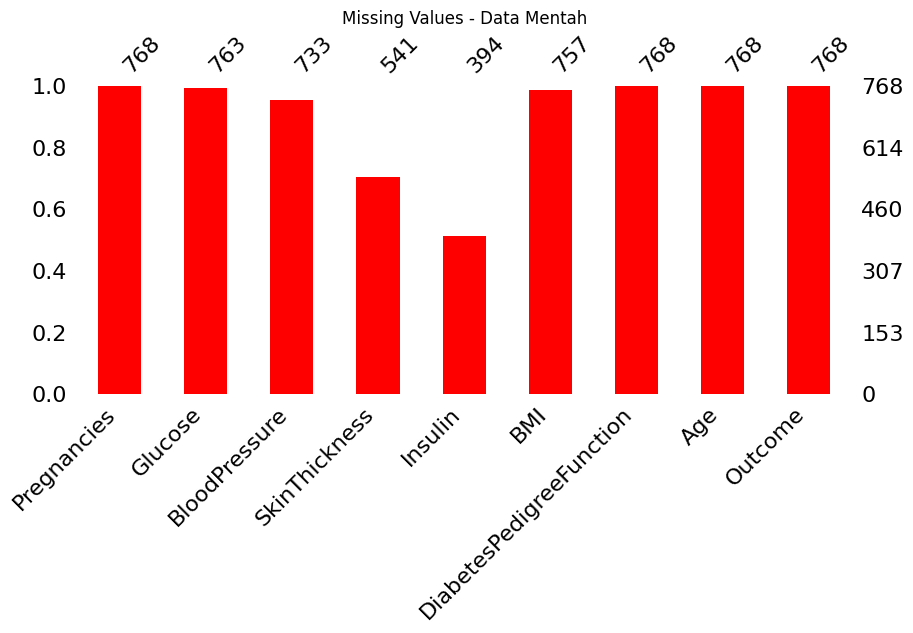

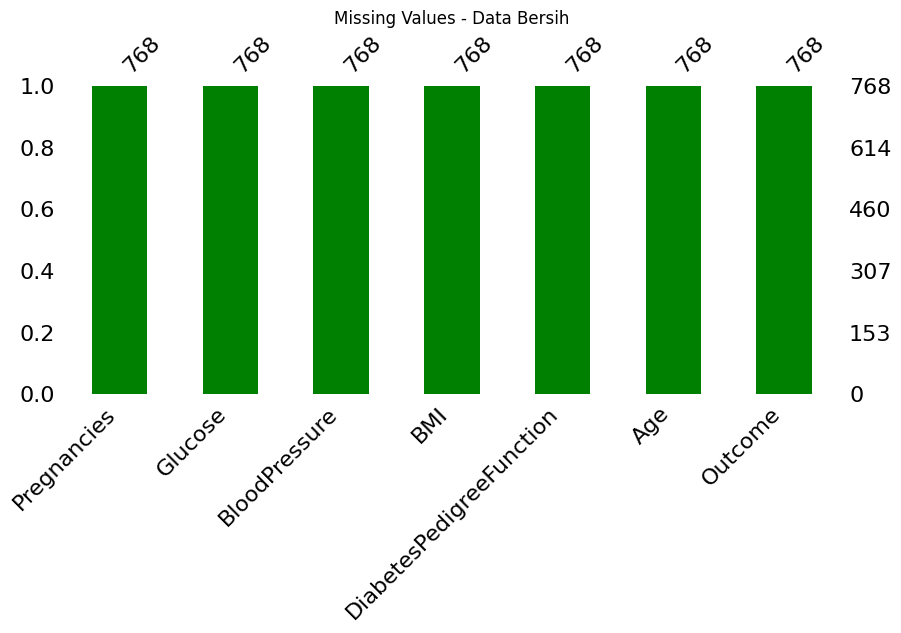

In [63]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

st.set_page_config(page_title="Prediksi Diabetes", page_icon="🩺", layout="wide")

@st.cache_data
def load_raw_data():
    """Load data mentah tanpa preprocessing untuk perbandingan"""
    df_raw = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df_raw.columns = df_raw.columns.str.strip()
    # Ganti 0 dengan NaN untuk kolom tertentu untuk visualisasi
    df_raw_viz = df_raw.copy()
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        df_raw_viz[col] = df_raw_viz[col].replace(0, np.nan)
    return df_raw, df_raw_viz

@st.cache_data
def load_data():
    """Load data yang sudah dibersihkan"""
    df = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df.columns = df.columns.str.strip()
    
    # Ganti 0 dengan NaN untuk kolom tertentu
    for col in ['Glucose', 'BloodPressure', 'BMI']:
        df[col] = df[col].replace(0, np.nan)
    
    # Isi NaN dengan median kolom
    df.fillna(df.median(numeric_only=True), inplace=True)
    
    # Hapus kolom Insulin dan SkinThickness
    df = df.drop(['Insulin', 'SkinThickness'], axis=1)
    
    return df

@st.cache_data
def prepare_clustering_data():
    """Prepare data untuk clustering sesuai dengan kode clustering asli"""
    df = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df.columns = df.columns.str.strip()
    
    df_clean = df.copy()
    cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
    
    # Handling Zeros Value (kecuali Pregnancies dan Age)
    for col in cols:
        if col not in ['Pregnancies', 'Age']:
            df_clean[col] = df_clean[col].replace(0, np.nan)

    # Imputasi dengan median
    for col in cols:
        if df_clean[col].isnull().sum() > 0:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
    
    # Fitur combine Glucose dan BloodPressure
    df_clean['Glucose_BloodPressure_Ratio'] = df_clean['Glucose'] / df_clean['BloodPressure']
    
    # Drop fitur yang tidak dipakai
    drop_cols = ['SkinThickness', 'DiabetesPedigreeFunction']
    df_clean = df_clean.drop(columns=drop_cols)
    
    # Feature Selection
    cols_selected = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'Age', 'Glucose_BloodPressure_Ratio']
    
    return df_clean, cols_selected

@st.cache_resource
def load_model():
    return joblib.load("naive_bayes_diabetes_model.pkl")

def plot_roc_curve(model, df):
    X = df[["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"]]
    y = df["Outcome"]

    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")
    return fig

def show_missing_value_comparison(df_raw_viz, df_clean):
    """Menampilkan perbandingan missing values sebelum dan sesudah preprocessing"""
    
    st.subheader("📊 Perbandingan Missing Values: Sebelum vs Sesudah Preprocessing")
    
    # Buat kolom untuk menampilkan side by side
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("#### 🔴 **Data Mentah (Sebelum Dibersihkan)**")
        
        # Hitung persentase missing values
        missing_before = df_raw_viz.isnull().sum()
        missing_pct_before = (missing_before / len(df_raw_viz)) * 100
        
        # Tampilkan tabel missing values
        missing_df_before = pd.DataFrame({
            'Kolom': missing_before.index,
            'Missing Count': missing_before.values,
            'Missing %': missing_pct_before.values
        }).round(2)
        missing_df_before = missing_df_before[missing_df_before['Missing Count'] > 0]
        
        if not missing_df_before.empty:
            st.dataframe(missing_df_before)
        else:
            st.info("Tidak ada missing values terdeteksi")
        
        # Visualisasi missing values - sebelum
        fig1, ax1 = plt.subplots(figsize=(10, 4))
        msno.bar(df_raw_viz, ax=ax1, color='red')
        ax1.set_title('Missing Values - Data Mentah')
        st.pyplot(fig1)
    
    with col2:
        st.markdown("#### 🟢 **Data Bersih (Sesudah Dibersihkan)**")
        
        # Hitung persentase missing values
        missing_after = df_clean.isnull().sum()
        missing_pct_after = (missing_after / len(df_clean)) * 100
        
        # Tampilkan tabel missing values
        missing_df_after = pd.DataFrame({
            'Kolom': missing_after.index,
            'Missing Count': missing_after.values,
            'Missing %': missing_pct_after.values
        }).round(2)
        missing_df_after = missing_df_after[missing_df_after['Missing Count'] > 0]
        
        if not missing_df_after.empty:
            st.dataframe(missing_df_after)
        else:
            st.success("✅ Tidak ada missing values!")
        
        # Visualisasi missing values - sesudah
        fig2, ax2 = plt.subplots(figsize=(10, 4))
        msno.bar(df_clean, ax=ax2, color='green')
        ax2.set_title('Missing Values - Data Bersih')
        st.pyplot(fig2)
    
    # Summary perbandingan
    st.markdown("---")
    st.markdown("#### 📈 **Ringkasan Preprocessing:**")
    
    total_missing_before = df_raw_viz.isnull().sum().sum()
    total_missing_after = df_clean.isnull().sum().sum()
    
    col_summary1, col_summary2, col_summary3 = st.columns(3)
    
    with col_summary1:
        st.metric("Missing Values Sebelum", total_missing_before)
    
    with col_summary2:
        st.metric("Missing Values Sesudah", total_missing_after)
    
    with col_summary3:
        reduction = total_missing_before - total_missing_after
        st.metric("Pengurangan Missing Values", reduction, delta=f"-{reduction}")
    
    # Informasi preprocessing yang dilakukan
    st.info("""
    **Langkah Preprocessing yang dilakukan:**
    - ✅ Mengubah nilai 0 menjadi NaN untuk kolom: Glucose, BloodPressure, BMI
    - ✅ Mengisi NaN dengan nilai median masing-masing kolom
    - ✅ Menghapus kolom Insulin dan SkinThickness dari model
    - ✅ Kolom yang tersisa untuk prediksi: Pregnancies, Glucose, BloodPressure, BMI, DiabetesPedigreeFunction, Age
    """)

def show_data_comparison(df_raw, df_clean):
    """Menampilkan perbandingan statistik data sebelum dan sesudah"""
    
    st.subheader("📋 Perbandingan Statistik Data")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("#### **Data Mentah**")
        st.dataframe(df_raw.describe().round(2))
    
    with col2:
        st.markdown("#### **Data Bersih**")
        st.dataframe(df_clean.describe().round(2))

def show_clustering_analysis():
    """Menampilkan analisis clustering lengkap di tab visualisasi"""
    st.subheader("🔍 Analisis Clustering K-Means")
    
    # Load data untuk clustering
    df_clean, cols_selected = prepare_clustering_data()
    
    # Prepare features untuk clustering
    features = df_clean[cols_selected]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(features)
    
    df_scaled = pd.DataFrame(scaled_data, columns=cols_selected)
    df_scaled['Outcome'] = df_clean['Outcome'].values
    
    # Elbow Method untuk menentukan K optimal
    st.markdown("#### 📊 Elbow Method untuk Menentukan K Optimal")
    
    inertia = []
    k_range = range(1, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(df_scaled.drop(columns=["Outcome"]))
        inertia.append(kmeans.inertia_)
    
    # Tentukan K optimal
    kl = KneeLocator(k_range, inertia, curve="convex", direction="decreasing")
    optimal_k = kl.elbow if kl.elbow else 3
    
    # Plot elbow method
    fig_elbow = go.Figure()
    fig_elbow.add_trace(go.Scatter(x=list(k_range), y=inertia, mode='lines+markers', name='Inertia'))
    fig_elbow.add_vline(x=optimal_k, line_dash="dash", line_color="red", 
                       annotation_text=f"Optimal K = {optimal_k}")
    fig_elbow.update_layout(title="Elbow Method untuk Menentukan K Optimal",
                           xaxis_title="Jumlah Cluster (k)",
                           yaxis_title="Inertia")
    st.plotly_chart(fig_elbow)
    
    st.info(f"🎯 **K Optimal yang direkomendasikan: {optimal_k}**")
    
    # PCA dan Clustering
    st.markdown("#### 🎨 Visualisasi Clustering dengan PCA")
    
    x_features = df_scaled.drop(columns=['Outcome'])
    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(x_features)
    df_pca = pd.DataFrame(data=principal_comp, columns=['PC1', 'PC2'])
    
    # Clustering dengan K=3 (sesuai kode asli)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
    clusters = kmeans.fit_predict(x_features)
    df_pca['Cluster'] = clusters.astype(str)
    df_pca['Outcome'] = df_clean['Outcome'].values
    
    # Plot clustering
    fig_cluster = go.Figure()
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, cluster in enumerate(sorted(df_pca['Cluster'].unique())):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        fig_cluster.add_trace(go.Scatter(
            x=cluster_data['PC1'], 
            y=cluster_data['PC2'],
            mode='markers',
            name=f'Cluster {cluster}',
            marker=dict(size=8, color=colors[i % len(colors)]),
            opacity=0.7
        ))
    
    fig_cluster.update_layout(title="Visualisasi Clustering dengan PCA (K=3)",
                             xaxis_title="PC1",
                             yaxis_title="PC2")
    st.plotly_chart(fig_cluster)
    
    # Evaluasi clustering
    score = silhouette_score(x_features, clusters)
    st.markdown(f"📈 **Silhouette Score:** `{score:.4f}`")
    
    if score < 0.5:
        st.warning("🔍 Skor ini menunjukkan bahwa clustering masih bisa diperbaiki.")
    elif score < 0.7:
        st.success("👍 Clustering cukup baik, meskipun masih ada sedikit overlap.")
    else:
        st.success("🚀 Clustering sangat baik! Cluster saling terpisah dengan jelas.")
    
    # Analisis cluster berdasarkan outcome
    st.markdown("#### 📊 Analisis Cluster berdasarkan Outcome Diabetes")
    
    cluster_outcome = pd.crosstab(clusters, df_clean['Outcome'], normalize='index') * 100
    
    fig_outcome = go.Figure()
    fig_outcome.add_trace(go.Bar(name='No Diabetes (0)', x=[f'Cluster {i}' for i in range(3)], 
                                y=cluster_outcome[0]))
    fig_outcome.add_trace(go.Bar(name='Diabetes (1)', x=[f'Cluster {i}' for i in range(3)], 
                                y=cluster_outcome[1]))
    
    fig_outcome.update_layout(title="Distribusi Outcome Diabetes per Cluster (%)",
                             xaxis_title="Cluster",
                             yaxis_title="Persentase (%)",
                             barmode='stack')
    st.plotly_chart(fig_outcome)
    
    # Statistik cluster
    st.markdown("#### 📋 Karakteristik Setiap Cluster")
    
    df_with_clusters = df_clean.copy()
    df_with_clusters['Cluster'] = clusters
    
    cluster_stats = df_with_clusters.groupby('Cluster')[cols_selected].mean().round(2)
    st.dataframe(cluster_stats)
    
    return df_clean, cols_selected, scaler, kmeans, pca

def show_clustering(df, input_df, df_cluster_data=None, cols_selected=None, scaler=None, kmeans_model=None, pca_model=None):
    """Fungsi clustering untuk tab prediksi dengan input user"""
    
    if df_cluster_data is None:
        df_cluster_data, cols_selected = prepare_clustering_data()
        
        # Prepare features untuk clustering
        features = df_cluster_data[cols_selected]
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(features)
        
        x_features = pd.DataFrame(scaled_data, columns=cols_selected)
        
        # Clustering
        kmeans_model = KMeans(n_clusters=3, random_state=42, n_init='auto')
        clusters = kmeans_model.fit_predict(x_features)
        
        # PCA
        pca_model = PCA(n_components=2)
        pca_result = pca_model.fit_transform(x_features)
    else:
        features = df_cluster_data[cols_selected]
        scaled_data = scaler.fit_transform(features)
        x_features = pd.DataFrame(scaled_data, columns=cols_selected)
        clusters = kmeans_model.fit_predict(x_features)
        pca_result = pca_model.fit_transform(x_features)
    
    # Siapkan input user untuk clustering
    # Mapping dari input prediksi ke format clustering
    user_cluster_input = pd.DataFrame([[
        input_df.iloc[0]['Pregnancies'],      # Pregnancies
        input_df.iloc[0]['Glucose'],          # Glucose  
        input_df.iloc[0]['BloodPressure'],    # BloodPressure
        df_cluster_data['Insulin'].median(),   # Insulin (gunakan median)
        input_df.iloc[0]['BMI'],              # BMI
        input_df.iloc[0]['Age'],              # Age
        input_df.iloc[0]['Glucose'] / input_df.iloc[0]['BloodPressure']  # Glucose_BloodPressure_Ratio
    ]], columns=cols_selected)
    
    # Transform user input
    user_scaled = scaler.transform(user_cluster_input)
    user_pca = pca_model.transform(user_scaled)
    user_cluster = kmeans_model.predict(user_scaled)[0]
    
    # Hitung Silhouette Score
    sil_score = silhouette_score(x_features, clusters)
    
    st.markdown(f"📈 **Silhouette Score untuk KMeans (k=3):** `{sil_score:.4f}`")
    if sil_score < 0.5:
        st.info("🔍 Skor ini menunjukkan bahwa clustering masih bisa diperbaiki.")
    elif sil_score < 0.7:
        st.success("👍 Clustering cukup baik, meskipun masih ada sedikit overlap.")
    else:
        st.success("🚀 Clustering sangat baik! Cluster saling terpisah dengan jelas.")
    
    # DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
    pca_df["Cluster"] = clusters.astype(str)
    
    # Plot
    st.subheader("📊 Posisi Anda dalam Clustering")
    
    fig = go.Figure()
    
    # Tambahkan data semua cluster
    colors = ['red', 'blue', 'green']
    for i, clust in enumerate(sorted(pca_df["Cluster"].unique())):
        subset = pca_df[pca_df["Cluster"] == clust]
        fig.add_trace(go.Scatter(
            x=subset["PCA1"], y=subset["PCA2"],
            mode='markers',
            name=f'Cluster {clust}',
            marker=dict(size=7, color=colors[i]),
            opacity=0.6
        ))
    
    # Tambahkan titik user
    fig.add_trace(go.Scatter(
        x=[user_pca[0][0]], y=[user_pca[0][1]],
        mode='markers+text',
        name="Input Anda",
        marker=dict(size=15, color='black', symbol='x'),
        text=["Anda"],
        textposition="top center"
    ))
    
    fig.update_layout(title="Visualisasi PCA Clustering (Dengan Input Anda)", 
                      xaxis_title="PCA1", yaxis_title="PCA2")
    st.plotly_chart(fig)
    
    st.markdown(f"📌 **Input Anda termasuk dalam Cluster {user_cluster}**")
    
    # Informasi cluster
    cluster_info = {
        0: "Cluster dengan profil risiko rendah-sedang",
        1: "Cluster dengan profil risiko sedang-tinggi", 
        2: "Cluster dengan profil karakteristik khusus"
    }
    
    if user_cluster in cluster_info:
        st.info(f"ℹ️ {cluster_info[user_cluster]}")

# Load data & model
df_raw, df_raw_viz = load_raw_data()
df = load_data()
model = load_model()

st.title("Dashboard Prediksi Diabetes 🩺")
st.markdown("Prediksi kemungkinan diabetes berdasarkan data medis menggunakan model Naive Bayes.")

# Buat tabs
tab1, tab2 = st.tabs(["🔮 Prediksi", "📊 Visualisasi"])

with tab1:
    st.subheader("🔧 Input Parameter untuk Prediksi")
    
    col1, col2 = st.columns(2)
    with col1:
        pregnancies = st.slider("Pregnancies", int(df.Pregnancies.min()), int(df.Pregnancies.max()), int(df.Pregnancies.mean()))
        glucose = st.slider("Glucose", int(df.Glucose.min()), int(df.Glucose.max()), int(df.Glucose.mean()))
        bp = st.slider("BloodPressure", int(df.BloodPressure.min()), int(df.BloodPressure.max()), int(df.BloodPressure.mean()))

    with col2:
        bmi = st.slider("BMI", float(df.BMI.min()), float(df.BMI.max()), float(df.BMI.mean()))
        dpf = st.slider("DiabetesPedigreeFunction", float(df.DiabetesPedigreeFunction.min()), float(df.DiabetesPedigreeFunction.max()), float(df.DiabetesPedigreeFunction.mean()))
        age = st.slider("Age", int(df.Age.min()), int(df.Age.max()), int(df.Age.mean()))

    # Input dataframe sesuai dengan kolom yang digunakan model
    feature_names = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"]
    input_df = pd.DataFrame([[pregnancies, glucose, bp, bmi, dpf, age]], columns=feature_names)

    if st.button("Prediksi"):
        prediction = model.predict(input_df)[0]
        probability = model.predict_proba(input_df)[0]

        st.subheader("🔍 Hasil Prediksi")
        if prediction == 1:
            st.error(f"🩸 Diabetes dengan probabilitas {probability[1]:.2%}")
        else:
            st.success(f"✅ Tidak Diabetes dengan probabilitas {probability[0]:.2%}")

        st.plotly_chart(
            go.Figure(data=[go.Bar(x=["Tidak Diabetes", "Diabetes"], y=probability, marker_color=['blue', 'red'])])
            .update_layout(title="Probabilitas Kelas", yaxis=dict(range=[0,1]))
        )

        st.pyplot(plot_roc_curve(model, df))

        st.markdown("### 💡 Rekomendasi")
        if prediction == 1:
            st.markdown("- Konsultasi dengan dokter segera.\n- Pantau kadar gula darah secara rutin.")
        else:
            st.markdown("- Jaga pola makan sehat.\n- Lanjutkan gaya hidup aktif.")

        # Clustering dengan input user
        st.markdown("---")
        show_clustering(df, input_df)

with tab2:
    # Tambahkan visualisasi missing values
    show_missing_value_comparison(df_raw_viz, df)
    
    st.markdown("---")
    show_data_comparison(df_raw, df)
    
    st.markdown("---")
    # Tambahkan analisis clustering lengkap
    show_clustering_analysis()

In [64]:
from pyngrok import ngrok
import threading
import os
def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://8557-180-252-113-38.ngrok-free.app" -> "http://localhost:8501"
